# EDA for IMDB

- Robert Yonce
- 5/4/23

In [1]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load in CSVs and Combined

In [2]:
# Files

results_01 = pd.read_csv('data/final_tmdb_data_2001.csv.gz')

results_00 = pd.read_csv('data/final_tmdb_data_2000.csv.gz')

In [4]:

results_20 = pd.read_csv('data/final_tmdb_data_2020.csv.gz', engine='python')

results_19 = pd.read_csv('data/final_tmdb_data_2019.csv.gz', engine='python')

results_18 = pd.read_csv('data/final_tmdb_data_2018.csv.gz', engine='python')

In [3]:
# Combined DFs

frames = [results_00, results_01]

combined = pd.concat(frames)

In [5]:
# Info on combined DF

combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2562 entries, 0 to 1327
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2562 non-null   object 
 1   adult                  2560 non-null   float64
 2   backdrop_path          1391 non-null   object 
 3   belongs_to_collection  206 non-null    object 
 4   budget                 2560 non-null   float64
 5   genres                 2560 non-null   object 
 6   homepage               172 non-null    object 
 7   id                     2560 non-null   float64
 8   original_language      2560 non-null   object 
 9   original_title         2560 non-null   object 
 10  overview               2510 non-null   object 
 11  popularity             2560 non-null   float64
 12  poster_path            2303 non-null   object 
 13  production_companies   2560 non-null   object 
 14  production_countries   2560 non-null   object 
 15  rele

In [6]:
# check for duplicate ID's 

combined.duplicated(subset='id').sum()


1

In [7]:
# Drop duplicate ids and confirm there are no more duplicates

combined = combined.drop_duplicates(subset='id')
combined.duplicated(subset='id').sum()

0

## Making filters for Budget and Revenue

In [9]:
filter_financial = (combined['budget'] > 0) | (combined['revenue']>0)

filter_financial.value_counts()

False    1924
True      637
dtype: int64

In [10]:
combined = combined[filter_financial]
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637 entries, 1 to 1306
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                637 non-null    object 
 1   adult                  637 non-null    float64
 2   backdrop_path          540 non-null    object 
 3   belongs_to_collection  110 non-null    object 
 4   budget                 637 non-null    float64
 5   genres                 637 non-null    object 
 6   homepage               76 non-null     object 
 7   id                     637 non-null    float64
 8   original_language      637 non-null    object 
 9   original_title         637 non-null    object 
 10  overview               635 non-null    object 
 11  popularity             637 non-null    float64
 12  poster_path            618 non-null    object 
 13  production_companies   637 non-null    object 
 14  production_countries   637 non-null    object 
 15  relea

## Combine the two filters

- How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

    - 637 above

## Save DF to CSV

In [11]:
combined.to_csv("tmdb_results_combined.csv.gz", compression='gzip', index=False)

## How many movies are there in each of the certification categories (G/PG/PG-13/R)?

R        232
PG-13    131
PG        35
NR        17
G         15
Name: certification, dtype: int64

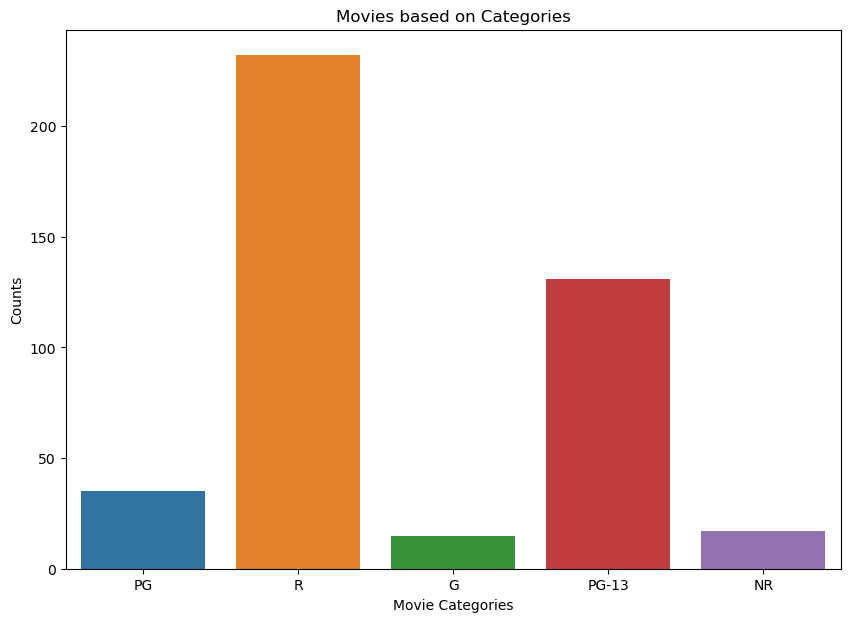

In [14]:
# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
ax = sns.countplot(data = combined, x ='certification')
ax.set(title = 'Movies based on Categories')
ax.set(ylabel = 'Counts')
ax.set(xlabel = 'Movie Categories');

display(combined['certification'].value_counts());

## What is the average revenue per certification category?

In [15]:
avg_rev = combined.groupby(['certification'])['revenue'].mean().reset_index()

avg_rev

,certification,revenue
0,G,1.173648e+08
1,NR,9.588674e+06
2,PG,1.106405e+08
3,PG-13,9.928786e+07
4,R,3.242712e+07


## What is the average budget per certification category?

In [16]:
avg_bud = combined.groupby('certification')['budget'].mean().reset_index()

avg_bud

,certification,budget
0,G,3.813333e+07
1,NR,6.302358e+06
2,PG,4.482849e+07
3,PG-13,4.299357e+07
4,R,1.948407e+07
